# Logistic Regression

In [3]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
DATASET_DIR = os.path.join(os.path.dirname(os.getcwd()), 'datasets')

In [5]:
red_file = os.path.join(DATASET_DIR, 'winequality-red.csv')
white_file = os.path.join(DATASET_DIR, 'winequality-white.csv')

In [6]:
wine_red = pd.read_csv(red_file, sep=';')
wine_white = pd.read_csv(white_file, sep=';')

In [9]:
wine_red.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [10]:
wine_white.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [11]:
len(wine_red), len(wine_white)

(1599, 4898)

## Binary Case(red인지 white인지 구분)

In [12]:
new_red = wine_red.copy()
new_white = wine_white.copy()

new_red['class'] = 'red'
new_white['class'] = 'white'

In [13]:
wine = new_red.append(new_white, ignore_index=True)

In [16]:
wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red


In [17]:
wine.tail(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


### 1. Feature_n: 2(volatile acidity, sulphates), Binary

In [18]:
X = wine[['volatile acidity', 'sulphates']]
y = wine['class']

In [19]:
X.head(2)

,volatile acidity,sulphates
0,0.70,0.56
1,0.88,0.68


In [20]:
y.value_counts()

white    4898
red      1599
Name: class, dtype: int64

##### split train&test

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=wine['class'], random_state=42, test_size=.2)

ValueError: Found input variables with inconsistent numbers of samples: [1599, 6497]

C:\ProgramData\Anaconda3\envs\study\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


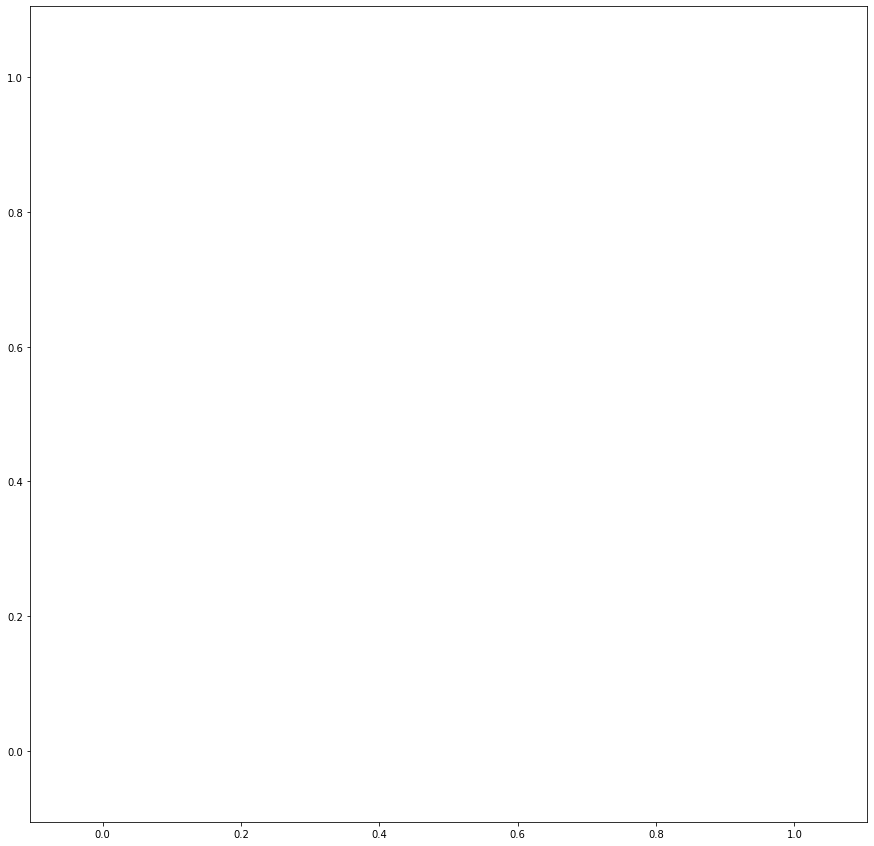

In [179]:
red_index = train_y[train_y=='red'].index
white_index = train_y[train_y=='white'].index
plt.figure(figsize=(15,15))

plt.scatter(
    x=train_X.loc[white_index, 'volatile acidity'], 
    y=train_X.loc[white_index, 'sulphates'], 
    color='g', 
    alpha=0.3
)

plt.scatter(
    x=train_X.loc[red_index, 'volatile acidity'], 
    y=train_X.loc[red_index, 'sulphates'], 
    color='r',  
    alpha=0.3
)

plt.show()

$$J(\theta) = -{1 \over m} \sum_{i=1}^m \left( y^{(i)}\,log(h_\theta(x^{(i)}) + (1-y^{(i)})\,log(1 - h_\theta(x^{(i)})) \right) + {\lambda \over 2m } \sum_{j=1}^n \theta_j^2 \tag{1}$$

In [180]:
from sklearn.linear_model import LogisticRegression
"""
LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                    intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, 
                    max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
                    
# penalty: str, ‘l1’, ‘l2’, or ‘none’, optional (default=’l2’)
The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.
If ‘none’ (not supported by the liblinear solver), no regularization is applied.

# penalty = Regularization
# l2: Ridge Regularization
# l1: Lasso Regularization


"""
# penaly = 'l2'
# dual    = False
# C       = 1.0  --> lambda(Regularization 정도) (낮을수록 높은 규제)
# solver  = 'liblinear' 
log_reg = LogisticRegression(solver='lbfgs') # no penalty
log_reg.fit(train_X, train_y)

C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarnin

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'

Comparison between the methods
#### 1. Newton’s Method

Recall the motivation for gradient descent step at x: we minimize the quadratic function (i.e. Cost Function).

Newton’s method uses in a sense a better quadratic function minimisation. A better because it uses the quadratic approximation (i.e. first AND second partial derivatives).

You can imagine it as a twisted Gradient Descent with The Hessian (The Hessian is a square matrix of second-order partial derivatives of order nxn).

Moreover, the geometric interpretation of Newton's method is that at each iteration one approximates f(x) by a quadratic function around xn, and then takes a step towards the maximum/minimum of that quadratic function (in higher dimensions, this may also be a saddle point). Note that if f(x) happens to be a quadratic function, then the exact extremum is found in one step.

Drawbacks:

It’s computationally expensive because of The Hessian Matrix (i.e. second partial derivatives calculations).

It attracts to Saddle Points which are common in multivariable optimization (i.e. a point its partial derivatives disagree over whether this input should be a maximum or a minimum point!).

####  2. Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm:

In a nutshell, it is analogue of the Newton’s Method but here the Hessian matrix is approximated using updates specified by gradient evaluations (or approximate gradient evaluations). In other words, using an estimation to the inverse Hessian matrix.

The term Limited-memory simply means it stores only a few vectors that represent the approximation implicitly.

If I dare say that when dataset is small, L-BFGS relatively performs the best compared to other methods especially it saves a lot of memory, however there are some “serious” drawbacks such that if it is unsafeguarded, it may not converge to anything.

####  3. A Library for Large Linear Classification:

It’s a linear classification that supports logistic regression and linear support vector machines (A linear classifier achieves this by making a classification decision based on the value of a linear combination of the characteristics i.e feature value).

The solver uses a coordinate descent (CD) algorithm that solves optimization problems by successively performing approximate minimization along coordinate directions or coordinate hyperplanes.

LIBLINEAR is the winner of ICML 2008 large-scale learning challenge. It applies Automatic parameter selection (a.k.a L1 Regularization) and it’s recommended when you have high dimension dataset (recommended for solving large-scale classification problems)

Drawbacks:

It may get stuck at a non-stationary point (i.e. non-optima) if the level curves of a function are not smooth.

Also cannot run in parallel.

It cannot learn a true multinomial (multiclass) model; instead, the optimization problem is decomposed in a “one-vs-rest” fashion so separate binary classifiers are trained for all classes.

Side note: According to Scikit Documentation: The “liblinear” solver is used by default for historical reasons.

#### 4. Stochastic Average Gradient:

SAG method optimizes the sum of a finite number of smooth convex functions. Like stochastic gradient (SG) methods, the SAG method's iteration cost is independent of the number of terms in the sum. However, by incorporating a memory of previous gradient values the SAG method achieves a faster convergence rate than black-box SG methods.

It is faster than other solvers for large datasets, when both the number of samples and the number of features are large.

Drawbacks:

It only supports L2 penalization.

Its memory cost of O(N), which can make it impractical for large N (because it remembers the most recently computed values for approx. all gradients).

#### 5. SAGA:

The SAGA solver is a variant of SAG that also supports the non-smooth penalty=l1 option (i.e. L1 Regularization). This is therefore the solver of choice for sparse multinomial logistic regression and it’s also suitable very Large dataset.

Side note: According to Scikit Documentation: The SAGA solver is often the best choice

In [181]:
# Returns the mean accuracy on the given test data and labels.
log_reg.score(train_X, train_y)

0.5918686473807663

In [182]:
# Returns the mean accuracy on the given test data and labels.
log_reg.score(test_X, test_y)

0.559375

In [183]:
train_X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [184]:
print(log_reg.intercept_)
log_reg.coef_


[  0.58300929  -2.89743993   1.37366033  -0.3182936   -1.64837994
 -15.95046166]


array([[ 5.24707817e-02,  2.33314975e+00, -2.70196282e-01,
         4.02071433e-01,  7.87656840e-02, -8.83126379e-02,
        -4.43374889e-02, -4.01168973e-03,  6.19256233e-01,
        -4.88900528e-01, -7.73493172e-01],
       [-1.29304177e-01,  1.86324350e+00, -6.92447172e-01,
         2.22390537e-01,  1.47852264e-01, -3.86654582e-02,
        -4.81333028e-03, -5.06092596e-01,  6.43106642e-01,
        -4.87400477e-01, -1.46852392e-01],
       [ 4.71607299e-04,  1.56574207e+00,  9.22980121e-01,
        -7.25237206e-02,  9.78443336e-01, -1.76682150e-02,
         1.93895782e-02,  1.05615670e+00,  1.98342019e+00,
        -1.47148681e+00, -9.66228287e-01],
       [ 5.28821988e-02, -1.15733776e+00, -1.02741819e+00,
        -2.93208281e-02, -2.34089337e-01,  2.10566677e-02,
        -1.22169200e-02, -2.43293599e-01, -6.79460478e-01,
         5.93842724e-01,  2.64521382e-01],
       [-5.77016510e-02, -3.17918207e+00, -2.43287443e-03,
         1.34804200e-01, -1.14046220e+00,  2.16124948e-02,
  

In [185]:
# Weight (Theta)
list(zip(train_X.columns, log_reg.coef_.reshape(-1, 1))), \
log_reg.intercept_

([('fixed acidity', array([0.05247078])),
  ('volatile acidity', array([2.33314975])),
  ('citric acid', array([-0.27019628])),
  ('residual sugar', array([0.40207143])),
  ('chlorides', array([0.07876568])),
  ('free sulfur dioxide', array([-0.08831264])),
  ('total sulfur dioxide', array([-0.04433749])),
  ('density', array([-0.00401169])),
  ('pH', array([0.61925623])),
  ('sulphates', array([-0.48890053])),
  ('alcohol', array([-0.77349317]))],
 array([  0.58300929,  -2.89743993,   1.37366033,  -0.3182936 ,
         -1.64837994, -15.95046166]))

In [186]:
# result_line = test_X.dot(log_reg.coef_.T)
# result_line.columns=['line']
# result_line.head(3)

In [187]:
log_reg.predict_log_proba(test_X)

array([[-7.74513961, -4.8229051 , -2.46309018, -0.60872969, -1.05832182,
        -4.18165712],
       [-4.3141421 , -3.05929603, -0.79619693, -0.84314209, -2.91069762,
        -5.55545801],
       [-7.00873353, -3.21355014, -0.4861553 , -1.12043917, -4.10813892,
        -6.62915076],
       ...,
       [-8.64162612, -5.08031498, -1.62251373, -0.58352776, -1.4727474 ,
        -4.71250205],
       [-5.51028069, -3.11944516, -3.48066419, -0.60997727, -1.20082431,
        -2.56815162],
       [-9.10739112, -3.9077047 , -0.22681358, -1.73967027, -4.98694434,
        -8.02105948]])

In [188]:
log_reg.predict_proba(test_X)

array([[4.32841214e-04, 8.04338634e-03, 8.51713491e-02, 5.44041534e-01,
        3.47037712e-01, 1.52731771e-02],
       [1.33780215e-02, 4.69207142e-02, 4.51041049e-01, 4.30356178e-01,
        5.44377398e-02, 3.86629726e-03],
       [9.03952694e-04, 4.02135957e-02, 6.14986294e-01, 3.26136533e-01,
        1.64383392e-02, 1.32128470e-03],
       ...,
       [1.76599497e-04, 6.21795018e-03, 1.97401860e-01, 5.57926661e-01,
        2.29294654e-01, 8.98227534e-03],
       [4.04497183e-03, 4.41816755e-02, 3.07869558e-02, 5.43363218e-01,
        3.00946036e-01, 7.66771428e-02],
       [1.10843515e-04, 2.00865528e-02, 7.97069355e-01, 1.75578285e-01,
        6.82649209e-03, 3.28471830e-04]])

In [189]:
log_reg.predict(test_X)

array([6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6,
       6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6,
       6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5,
       6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5,
       7, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 6, 3, 6, 6, 5, 5, 6, 6, 6,
       5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5,
       6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5,
       5, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5,
       6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6,
       6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5,

In [190]:
log_reg.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

C:\ProgramData\Anaconda3\envs\study\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ValueError: operands could not be broadcast together with shapes (320,) (6,) 

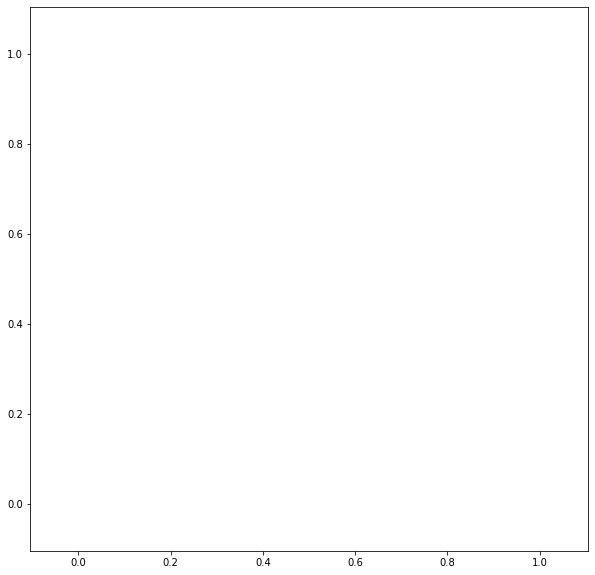

In [191]:
red_index = test_y[test_y=='red'].index
white_index = test_y[test_y=='white'].index
plt.figure(figsize=(10,10))

plt.scatter(
    x=test_X.loc[white_index, 'volatile acidity'], 
    y=test_X.loc[white_index, 'sulphates'], 
    color='r', 
    alpha=0.3
)
plt.scatter(
    x=test_X.loc[red_index, 'volatile acidity'],
    y=test_X.loc[red_index, 'sulphates'], 
    color='g',  
    alpha=0.3
)

# getting corresponding y co-ordinates of the decision boundary

# (test_X['volatile acidity'] * log_reg.coef_[0][0] + log_reg.intercept_)/log_reg.coef_[0][1]
# -(x_vals * w_guess[0] + b_guess[0])/w_guess[1]
# y_vals = -(x_vals * w_guess[0] + b_guess[0])/w_guess[1]

# 0 = W2X2 + W1X1 + W0
# X2 = - (W1X1 + W0)/W2

wy = -((test_X.iloc[:, 0] * log_reg.coef_[0,0]) \
    + log_reg.intercept_)/(log_reg.coef_[0,1])

plt.plot(test_X.iloc[:, 0], wy)
plt.xlim(0, .9)
plt.ylim(0.3, .9)
plt.show()

## 실습2 Feature가  X1=total sulfur dioxide, X2= fixed acidity Y = white or red


In [192]:
X = wine[['total sulfur dioxide', 'fixed acidity']]
y = wine['class']

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=wine['class'], random_state=42, test_size=.2)

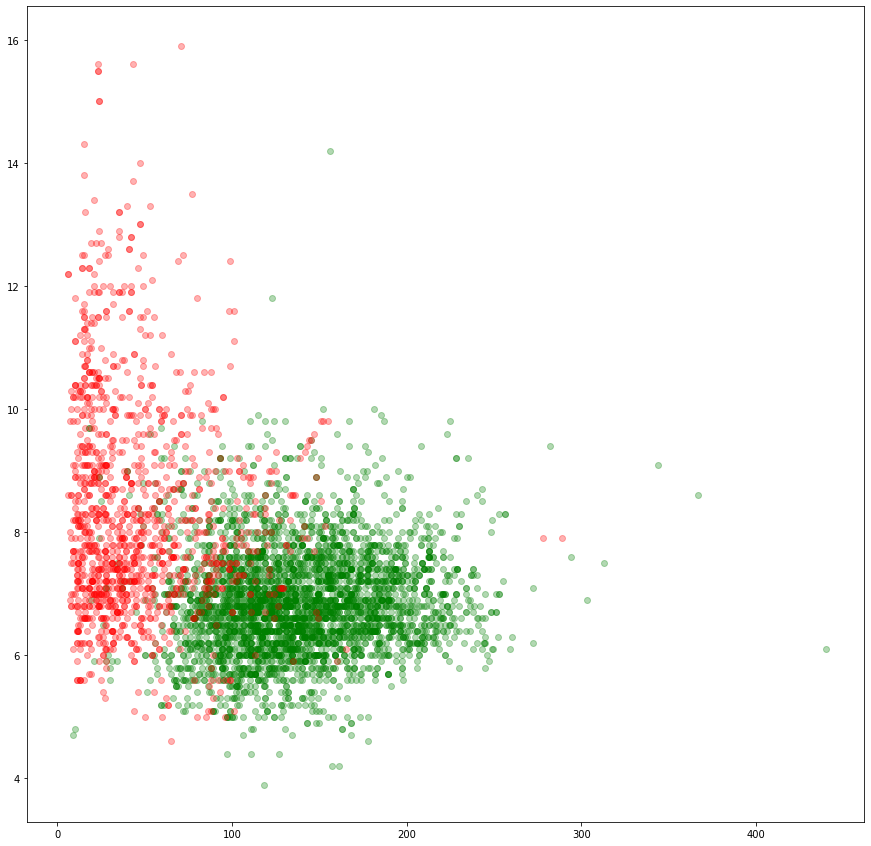

In [195]:
red_index = train_y[train_y=='red'].index
white_index = train_y[train_y=='white'].index
plt.figure(figsize=(15,15))

plt.scatter(
    x=train_X.loc[white_index, 'total sulfur dioxide'], 
    y=train_X.loc[white_index, 'fixed acidity'], 
    color='g', 
    alpha=0.3
)

plt.scatter(
    x=train_X.loc[red_index, 'total sulfur dioxide'], 
    y=train_X.loc[red_index, 'fixed acidity'], 
    color='r',  
    alpha=0.3
)

plt.show()

$$J(\theta) = -{1 \over m} \sum_{i=1}^m \left( y^{(i)}\,log(h_\theta(x^{(i)}) + (1-y^{(i)})\,log(1 - h_\theta(x^{(i)})) \right) + {\lambda \over 2m } \sum_{j=1}^n \theta_j^2 \tag{1}$$

In [196]:
from sklearn.linear_model import LogisticRegression
"""
LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                    intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, 
                    max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
                    
# penalty: str, ‘l1’, ‘l2’, or ‘none’, optional (default=’l2’)
The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.
If ‘none’ (not supported by the liblinear solver), no regularization is applied.

# penalty = Regularization
# l2: Ridge Regularization
# l1: Lasso Regularization


"""
# penaly = 'l2'
# dual    = False
# C       = 1.0  --> lambda(Regularization 정도) (낮을수록 높은 규제)
# solver  = 'liblinear' 
log_reg = LogisticRegression(solver='lbfgs') # no penalty
log_reg.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [197]:
# Returns the mean accuracy on the given test data and labels.
log_reg.score(train_X, train_y)

0.9345776409467

In [198]:
# Returns the mean accuracy on the given test data and labels.
log_reg.score(test_X, test_y)

# accuracy: 정확도 - 정답 / 전체 데이터 

0.9376923076923077

In [199]:
train_X.columns

Index(['total sulfur dioxide', 'fixed acidity'], dtype='object')

In [200]:
print(log_reg.intercept_)
log_reg.coef_


[2.5408885]


array([[ 0.05958481, -0.92000664]])

In [92]:
# Weight (Theta)
list(zip(train_X.columns, log_reg.coef_.reshape(-1, 1))), \
log_reg.intercept_

([('total sulfur dioxide', array([0.05958481])),
  ('fixed acidity', array([-0.92000664]))],
 array([2.5408885]))

In [93]:
# result_line = test_X.dot(log_reg.coef_.T)
# result_line.columns=['line']
# result_line.head(3)

In [112]:
log_reg.predict_proba(test_X)

array([[2.08683919e-01, 7.91316081e-01],
       [5.87300820e-03, 9.94126992e-01],
       [7.54377602e-04, 9.99245622e-01],
       ...,
       [4.77601075e-02, 9.52239892e-01],
       [3.02617620e-03, 9.96973824e-01],
       [1.74469613e-03, 9.98255304e-01]])

In [113]:
# 
log_reg.predict_log_proba(test_X)

array([[-1.56693452e+00, -2.34057795e-01],
       [-5.13738831e+00, -5.89032213e-03],
       [-7.18961752e+00, -7.54662288e-04],
       ...,
       [-3.04156456e+00, -4.89382881e-02],
       [-5.80045544e+00, -3.03076433e-03],
       [-6.35117488e+00, -1.74621988e-03]])

In [95]:
log_reg.predict_proba(test_X)

array([[2.08683919e-01, 7.91316081e-01],
       [5.87300820e-03, 9.94126992e-01],
       [7.54377602e-04, 9.99245622e-01],
       ...,
       [4.77601075e-02, 9.52239892e-01],
       [3.02617620e-03, 9.96973824e-01],
       [1.74469613e-03, 9.98255304e-01]])

In [114]:
log_reg.predict(test_X)

array(['white', 'white', 'white', ..., 'white', 'white', 'white'],
      dtype=object)

In [115]:
log_reg.classes_

array(['red', 'white'], dtype=object)

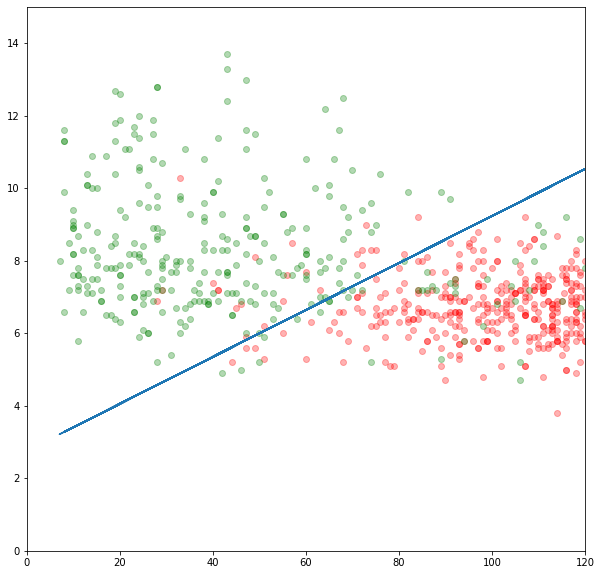

In [118]:
red_index = test_y[test_y=='red'].index
white_index = test_y[test_y=='white'].index
plt.figure(figsize=(10,10))

plt.scatter(
    x=test_X.loc[white_index, 'total sulfur dioxide'], 
    y=test_X.loc[white_index, 'fixed acidity'], 
    color='r', 
    alpha=0.3
)
plt.scatter(
    x=test_X.loc[red_index, 'total sulfur dioxide'],
    y=test_X.loc[red_index, 'fixed acidity'], 
    color='g',  
    alpha=0.3
)


# 0 = W2X2 + W1X1 + W0
# X2 = - (W1X1 + W0)/W2

wy = -((test_X.iloc[:, 0] * log_reg.coef_[0,0]) \
    + log_reg.intercept_)/(log_reg.coef_[0,1])

plt.plot(test_X.iloc[:, 0], wy)
plt.xlim(0, 120)
plt.ylim(0, 15)
plt.show()

### 1. Feature_n: 모든Feature, Binary

##### split train&test

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X = wine.drop('class', axis=1)
y = wine['class']

In [122]:
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=wine['class'], random_state=42, test_size=.2)

In [123]:
train_X.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4110,6.2,0.30,0.49,11.2,0.058,68.0,215.0,0.99656,3.19,0.60,9.4,6
3062,8.3,0.19,0.49,1.2,0.051,11.0,137.0,0.99180,3.06,0.46,11.0,6
5236,8.7,0.30,0.34,4.8,0.018,23.0,127.0,0.99474,3.12,0.49,11.2,7


In [125]:
train_y.head(3)

4110    white
3062    white
5236    white
Name: class, dtype: object

$$J(\theta) = -{1 \over m} \sum_{i=1}^m \left( y^{(i)}\,log(h_\theta(x^{(i)}) + (1-y^{(i)})\,log(1 - h_\theta(x^{(i)})) \right) + {\lambda \over 2m } \sum_{j=1}^n \theta_j^2 \tag{1}$$

In [129]:
from sklearn.linear_model import LogisticRegression
"""
LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                    intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, 
                    max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
                    
# penalty: str, ‘l1’, ‘l2’, or ‘none’, optional (default=’l2’)
The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.
If ‘none’ (not supported by the liblinear solver), no regularization is applied.

# penalty = Regularization
# l2: Ridge Regularization
# l1: Lasso Regularization


"""
# penaly = 'l2'
# dual    = False
# tol     = 0.0001
# C       = 1.0  --> lambda(Regularization 정도) (낮을수록 높은 규제)
# solver  = 'liblinear'
log_reg = LogisticRegression('l2', solver='lbfgs', max_iter=5000)
log_reg.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
log_reg.score(train_X, train_y)

0.9855685972676544

In [131]:
log_reg.score(test_X, test_y)

0.9846153846153847

In [132]:
pred_train = log_reg.predict(test_X)
pred_train

array(['white', 'white', 'white', ..., 'red', 'white', 'white'],
      dtype=object)

In [133]:
print(log_reg.coef_.shape)
log_reg.coef_

(1, 12)


array([[-1.12697627, -7.83080643,  0.76171805,  0.09135946, -2.8659626 ,
        -0.04492276,  0.05669   , -0.20695569, -5.9296266 , -5.94767794,
         0.50432565,  0.06189665]])

In [134]:
list(zip(train_X.columns, log_reg.coef_.reshape(-1,1)))

[('fixed acidity', array([-1.12697627])),
 ('volatile acidity', array([-7.83080643])),
 ('citric acid', array([0.76171805])),
 ('residual sugar', array([0.09135946])),
 ('chlorides', array([-2.8659626])),
 ('free sulfur dioxide', array([-0.04492276])),
 ('total sulfur dioxide', array([0.05669])),
 ('density', array([-0.20695569])),
 ('pH', array([-5.9296266])),
 ('sulphates', array([-5.94767794])),
 ('alcohol', array([0.50432565])),
 ('quality', array([0.06189665]))]

In [135]:
print(log_reg.classes_)
test_proba = log_reg.predict_proba(test_X)
test_proba

['red' 'white']


array([[7.98421282e-02, 9.20157872e-01],
       [8.62478586e-04, 9.99137521e-01],
       [2.90355260e-03, 9.97096447e-01],
       ...,
       [9.60789018e-01, 3.92109823e-02],
       [6.32716474e-03, 9.93672835e-01],
       [6.47355994e-04, 9.99352644e-01]])

# Red Wine 'Quality' Classification

In [136]:
import sklearn

In [137]:
sklearn.__version__

'0.21.2'

### 2. Feature_n: 모든Feature, Quality

##### split train&test

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X = wine_red.drop('quality', axis=1)
y = wine_red['quality']

In [141]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [142]:
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, random_state=42, test_size=.2)

In [143]:
train_X.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1542,6.7,0.855,0.02,1.9,0.064,29.0,38.0,0.99472,3.30,0.56,10.75
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.50
344,11.9,0.570,0.50,2.6,0.082,6.0,32.0,1.00060,3.12,0.78,10.70


In [144]:
train_y.head()

1542    6
1558    5
344     6
924     5
971     6
Name: quality, dtype: int64

#### fit

In [161]:
from sklearn.linear_model import LogisticRegression
"""
LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                    intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, 
                    max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
                    
# penalty: str, ‘l1’, ‘l2’, or ‘none’, optional (default=’l2’)
The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.
If ‘none’ (not supported by the liblinear solver), no regularization is applied.

# penalty = Regularization
# l2: Ridge Regularization
# l1: Lasso Regularization
"""
# penaly = 'l2'
# dual    = False
# tol     = 0.0001
# C       = 1.0  --> lambda(Regularization 정도) (낮을수록 높은 규제)
# solver  = 'liblinear'

# 
log_reg = LogisticRegression(
    solver='lbfgs', 
    multi_class='multinomial', 
    max_iter=10000
)
log_reg.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [162]:
log_reg.score(train_X, train_y)

0.6043784206411259

In [163]:
log_reg.score(test_X, test_y)

0.590625

In [164]:
pred_train = log_reg.predict(test_X)
pred_train[:4]

array([6, 5, 5, 5], dtype=int64)

In [168]:
log_reg.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [165]:
"""
[ 7.88121976e-02,  2.29640306e+00, -2.59811553e-01,
         3.51096115e-01,  9.07423967e-02, -7.82504152e-02,
        -2.81084952e-02,  4.23928379e-02,  7.15272494e-01,
        -5.18184670e-01, -8.95580764e-01] * X -> 나오는 값 하나
        
"""

# CLASS
# 3
"""
[ 7.88121976e-02,  2.29640306e+00, -2.59811553e-01,
         3.51096115e-01,  9.07423967e-02, -7.82504152e-02,
        -2.81084952e-02,  4.23928379e-02,  7.15272494e-01,
        -5.18184670e-01, -8.95580764e-01].dot(X)
"""
# 4
"""
[-8.87611915e-02,  1.68370253e+00, -6.32347404e-01,
         1.47458917e-01,  1.51909657e-01, -2.56580866e-02,
         1.07064627e-02, -4.43791402e-03,  8.18233844e-01,
        -4.88923584e-01, -3.49219234e-01].dot(X)
"""
# 5
# 6
# 7
# 8

log_reg.coef_

array([[ 7.88121976e-02,  2.29640306e+00, -2.59811553e-01,
         3.51096115e-01,  9.07423967e-02, -7.82504152e-02,
        -2.81084952e-02,  4.23928379e-02,  7.15272494e-01,
        -5.18184670e-01, -8.95580764e-01],
       [-8.87611915e-02,  1.68370253e+00, -6.32347404e-01,
         1.47458917e-01,  1.51909657e-01, -2.56580866e-02,
         1.07064627e-02, -4.43791402e-03,  8.18233844e-01,
        -4.88923584e-01, -3.49219234e-01],
       [-7.75719024e-02,  6.65739090e-01,  5.15418578e-01,
        -9.81443166e-02,  7.67789143e-01,  6.78545524e-03,
         2.19600675e-02,  3.63129899e-02,  9.38161530e-02,
        -1.54155208e+00, -8.61288026e-01],
       [ 2.31683244e-02, -1.27823653e+00, -5.54578698e-01,
        -6.72157322e-02, -7.13036570e-02,  2.55009521e-02,
         5.93932774e-03, -1.12515571e-03, -5.62666839e-01,
        -9.82696160e-02,  6.08955572e-02],
       [ 5.14961294e-02, -3.04297456e+00,  2.00314144e-01,
         6.29374671e-02, -8.30156015e-01,  3.50963430e-02,
  

In [175]:
print(log_reg.coef_.shape)
log_reg.coef_

(6, 11)


array([[ 7.88121976e-02,  2.29640306e+00, -2.59811553e-01,
         3.51096115e-01,  9.07423967e-02, -7.82504152e-02,
        -2.81084952e-02,  4.23928379e-02,  7.15272494e-01,
        -5.18184670e-01, -8.95580764e-01],
       [-8.87611915e-02,  1.68370253e+00, -6.32347404e-01,
         1.47458917e-01,  1.51909657e-01, -2.56580866e-02,
         1.07064627e-02, -4.43791402e-03,  8.18233844e-01,
        -4.88923584e-01, -3.49219234e-01],
       [-7.75719024e-02,  6.65739090e-01,  5.15418578e-01,
        -9.81443166e-02,  7.67789143e-01,  6.78545524e-03,
         2.19600675e-02,  3.63129899e-02,  9.38161530e-02,
        -1.54155208e+00, -8.61288026e-01],
       [ 2.31683244e-02, -1.27823653e+00, -5.54578698e-01,
        -6.72157322e-02, -7.13036570e-02,  2.55009521e-02,
         5.93932774e-03, -1.12515571e-03, -5.62666839e-01,
        -9.82696160e-02,  6.08955572e-02],
       [ 5.14961294e-02, -3.04297456e+00,  2.00314144e-01,
         6.29374671e-02, -8.30156015e-01,  3.50963430e-02,
  

In [172]:
# list(zip(train_X.columns, log_reg.coef_.reshape))

In [173]:
print(log_reg.classes_)
test_proba = log_reg.predict_proba(test_X)
test_proba

[3 4 5 6 7 8]


array([[3.48313538e-04, 6.29846450e-03, 9.51729768e-02, 5.84933065e-01,
        2.96007677e-01, 1.72395026e-02],
       [1.47726291e-02, 5.02281187e-02, 4.60837615e-01, 4.31647979e-01,
        3.95488244e-02, 2.96483340e-03],
       [9.60094120e-04, 4.15331151e-02, 6.76633677e-01, 2.69962770e-01,
        1.01407194e-02, 7.69623761e-04],
       ...,
       [1.92773325e-04, 6.85341417e-03, 1.27629606e-01, 5.50400080e-01,
        3.03461155e-01, 1.14629723e-02],
       [3.17113688e-03, 2.66443137e-02, 4.08745765e-02, 5.70125684e-01,
        2.62594654e-01, 9.65896345e-02],
       [7.84094682e-05, 1.39422497e-02, 8.71889976e-01, 1.11849484e-01,
        2.16906408e-03, 7.08176150e-05]])

In [174]:
log_reg.predict(test_X)

array([6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 7, 6, 6, 6,
       6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 7, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6,
       6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5,
       6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5,
       7, 5, 5, 5, 6, 7, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6,
       5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 3, 6, 6, 5, 5, 6, 6, 5,
       5, 6, 6, 7, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 7, 7, 5,
       6, 5, 6, 7, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 5, 5, 5, 6, 6, 6, 7, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5,
       5, 6, 5, 5, 7, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5,
       7, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6,
       6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5,

# 3. 실습: White Wine softmax (label = quality)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6


# 4. All(Red+White)에 대한 Softmax (label = quality)

In [203]:
new_white = wine_white.copy()
new_red = wine_red.copy()

new_white['is_red'] = 0
new_red['is_red'] = 1

wine = new_white.append(new_red, ignore_index=True)

wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,0


In [205]:
X = wine.drop('quality', axis=1)
y = wine['quality']

In [207]:
from sklearn.model_selection import train_test_split
X_train, y_train, X_test,y_test = train_test_split(X, y, test_size=.2, random_state=20, stratify=y)

In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=.2, random_state=20, stratify=y)

In [211]:
X_train.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red
6133,6.0,0.33,0.32,12.90,0.054,6.0,113.0,0.99572,3.30,0.56,11.5,1
1198,7.1,0.26,0.32,14.45,0.074,29.0,107.0,0.99800,2.96,0.42,9.2,0


In [212]:
y_train.head(2)

6133    4
1198    6
Name: quality, dtype: int64

In [214]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(
    solver='lbfgs', 
    multi_class='multinomial', 
    max_iter=30000
)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=30000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [216]:
log_reg.score(X_train, y_train)

0.5478160477198384

In [204]:
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split(wine,)

In [ ]:
new_red = wine_red.copy()

# for q in wineData['quality'].values:
#     if q < 6:
#         c.append(0)
#     elif q > 6:
#         c.append(2)
#     else:
#         c.append(1)

new_red['quality'].hist()
new_red['quality'].value_counts(sort=False)

In [ ]:
def quality_categorize(data):
    if data['quality'] <=4:
        return 'pool'
    elif data['quality'] ==5:
        return 'midlow'
    elif data['quality'] ==6:
        return 'midhigh'
    elif data['quality'] >=7:
        return 'excelent'

In [ ]:
new_red['rank'] = new_red.apply(quality_categorize, axis=1)
new_red.head(5)

In [ ]:
from sklearn.model_selection import train_test_split

X = new_red.drop(['quality', 'rank'], axis=1)
y = new_red['rank']

train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, random_state=42)

train_X.head(3)

In [ ]:
from sklearn.linear_model import LogisticRegression
"""
LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                    intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, 
                    max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
                    
# penalty: str, ‘l1’, ‘l2’, or ‘none’, optional (default=’l2’)
The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.
If ‘none’ (not supported by the liblinear solver), no regularization is applied.

# penalty = Regularization
# l2: Ridge Regularization
# l1: Lasso Regularization
"""
# penaly = 'l2'
# dual    = False
# tol     = 0.0001
# C       = 1.0  --> lambda(Regularization 정도) (낮을수록 높은 규제)
# solver  = 'liblinear'

# 
log_reg = LogisticRegression('none', solver='saga', multi_class='multinomial', max_iter=5000) # no penalty
log_reg.fit(train_X, train_y)

In [ ]:
log_reg.score(train_X, train_y)

In [ ]:
log_reg.score(test_X, test_y)

In [ ]:
pred_train = log_reg.predict(test_X)
pred_train

In [ ]:
print(log_reg.coef_.shape)
log_reg.coef_

In [ ]:
list(zip(train_X.columns, log_reg.coef_.reshape(-1,1)))

In [ ]:
print(log_reg.classes_)
test_proba = log_reg.predict_proba(test_X)
test_proba